In [31]:
library(qvalue)

In [32]:
folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/April2021/PCA/"

In [33]:
file = paste0(folder, "PC10/summary.csv")
df = read.csv(file, row.names=1)
nrow(df)
head(df,2)

[1] 140

,gene,n_snps,chrom,pv_raw,snpID,pv
0,ATRAID,2,2,0.03388709,2_27389195_A_G,0.06777417
1,ATRAID,2,2,0.45140610,2_27527246_T_A,0.90281219


In [34]:
df = df[order(df$pv, df$pv_raw),]
df = df[-which(duplicated(df$gene)),]
# df$qv = p.adjust(df$pv, method = "BH")
df$qv = qvalue(df$pv, pi0 = 1)$qvalue

In [35]:
c(length(unique(df[df$qv<0.05,"gene"])), length(unique(df[df$qv<0.05,"gene"]))/length(unique(df$gene)))

[1] 54.0  0.6

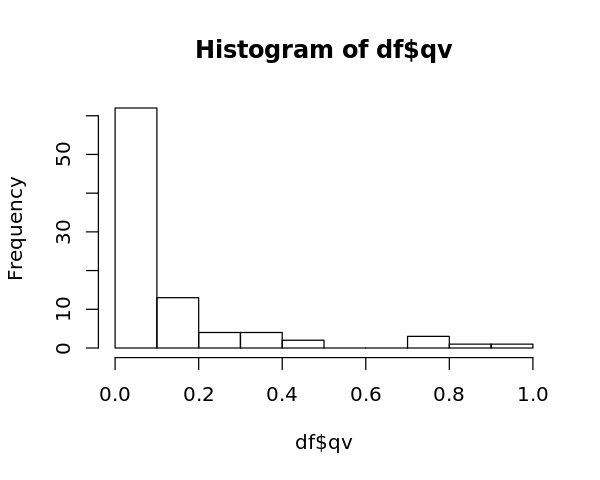

In [36]:
options(repr.plot.width = 5, repr.plot.height = 4)
hist(df$qv)